#Assignment 6

- NAME - ROHAN BAGHEL
- STUDENT ID - 202116011

In [ ]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Colab").config('spark.ui.port', '4050').getOrCreate()

In [ ]:
sc=spark.sparkContext

#Question 1

a) Basic RDD Operation

In [ ]:
lines = sc.parallelize(["Hello World","How are you Python","Know Your Enemy","Enjoy"])

In [ ]:
lines.collect()

['Hello World', 'How are you Python', 'Know Your Enemy', 'Enjoy']

In [ ]:
pythonLines = lines.filter(lambda line: "Python" in line)

In [ ]:
pythonLines.first()

'How are you Python'

In [ ]:
pythonLines.persist

<bound method RDD.persist of PythonRDD[106] at RDD at PythonRDD.scala:53>

In [ ]:
pythonLines.count()

1

In [ ]:
pythonLines.first()

'How are you Python'

Table 3-2

In [ ]:
nums = sc.parallelize([1, 2, 3, 3])

In [ ]:
# Map()
'''Apply a function to each element in the RDD and return an RDD of the result.'''
map1 = nums.map(lambda x: x + 1)
map1.collect()

[2, 3, 4, 4]

In [ ]:
# flatmap()
'''Apply a function to each element in the RDD and return an RDD of the contents of the iterators returned. Often used to extract words.'''
fmap = nums.flatMap(lambda x: [x, x * 2]);
fmap.collect()

[1, 2, 2, 4, 3, 6, 3, 6]

In [ ]:
# filter()
'''Return an RDD consisting of only elements that pass the condition passed to filter() .''' 

fltr = nums.filter(lambda x: x != 1)
fltr.collect()


[2, 3, 3]

In [ ]:
# distinct()
'''Remove duplicates.'''
nums.distinct().collect()

[1, 2, 3]

In [ ]:
# sample(withRe placement, fraction, [seed])
'''Sample an RDD, with or without replacement.'''

nums.sample( False , 0.5).collect()

[1, 2, 3]

Table 3-3

In [ ]:
rdd = sc.parallelize([1, 2, 3, 3])
other = sc.parallelize([3,4,5])

In [ ]:
# union()
'''Produce an RDD containing elements from both RDDs'''
rdd.union(other).collect()

[1, 2, 3, 3, 3, 4, 5]

In [ ]:
# intersection()
'''RDD containing only elements found in remove training data).'''
rdd.intersection(other).collect()

[3]

In [ ]:
# subtract()
'''Remove the contents of one RDD (e.g., remove training data).'''
rdd.subtract(other).collect()

[2, 1]

In [ ]:
# cartesian()
'''Cartesian product with the other RDD. '''

rdd.cartesian(other).collect()

[(1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 3),
 (3, 4),
 (3, 5)]

Table 3-4

In [ ]:
rdd = sc.parallelize([1, 2, 3, 3])

In [ ]:
# collect()
'''Return all elements from the RDD.'''
rdd.collect()

[1, 2, 3, 3]

In [ ]:
# count()
'''Number of elements in the RDD.'''

rdd.count()

4

In [ ]:
# countByValue()
'''Number of times each element occurs in the RDD.'''

rdd.countByValue()

defaultdict(int, {1: 1, 2: 1, 3: 2})

In [ ]:
# take(num)
''' Return num elements from the RDD. '''
rdd.take(2)

[1, 2]

In [ ]:
# top(num)
'''Return the top num elements the RDD. '''
rdd.top(2)

[3, 3]

In [ ]:
# takeOrdered(num)(ordering)
''' Return num elements based on provided ordering. '''

rdd.takeOrdered(2)

[1, 2]

In [ ]:
# takeSample(withReplacement, num, [seed])
''' Return num elements at random. '''

rdd.takeSample(False, 1)

[3]

In [ ]:
# reduce(func)
''' Combine the elements of the RDD together in parallel (e.g., sum ). '''

rdd.reduce(lambda x, y: x + y)

9

In [ ]:
# fold(zero)(func)
''' Same as reduce() but with the provided zero value.'''

rdd.fold(0, lambda x, y: x + y )

9

In [ ]:
# aggregate(zeroValue)(seqOp, combOp)
'''  Similar to reduce() but used to return a different type. '''
rdd.aggregate((0, 0),(lambda x,y:(x[0] + y, x[1] + 1)),(lambda x,y: (x[0] + y[0], x[1] + y[1])))

(9, 4)

In [ ]:
# foreach(func)
''' Apply the provided function to each element of the RDD. '''

rdd.foreach(lambda x: print(x))

b

In [ ]:
from pyspark import StorageLevel

In [ ]:
from typing import List
from pyspark.sql import Row

In [ ]:
result = nums.map(lambda x: x * x)

In [ ]:
result.collect()

[1, 4, 9, 9]

In [ ]:
result.persist(StorageLevel.DISK_ONLY)

PythonRDD[153] at collect at <ipython-input-141-e43ab5090625>:1

In [ ]:
result.count()

4

# Question 2

In [ ]:
'''
The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page.
1. Initialize each page’s rank to 1.0.
2. On each iteration, have page p send a contribution of rank(p)/numNeighbors(p) to its neighbors (the pages it has links to).
3. Set each page’s rank to 0.15 + 0.85 * contributionsReceived.
The last two steps repeat for several iterations, during which the algorithm will con‐ verge to the correct PageRank value for each page. In practice, it’s typical to run about 10 iterations.
'''

'\nThe PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page.\n1. Initialize each page’s rank to 1.0.\n2. On each iteration, have page p send a contribution of rank(p)/numNeighbors(p) to its neighbors (the pages it has links to).\n3. Set each page’s rank to 0.15 + 0.85 * contributionsReceived.\nThe last two steps repeat for several iterations, during which the algorithm will con‐ verge to the correct PageRank value for each page. In practice, it’s typical to run about 10 iterations.\n'

In [ ]:
links = sc.parallelize([("MapR",("Baidu","Blogger")), ("Baidu",("MapR")), ("Blogger",("Google","Baidu")), ("Google",("MapR"))])

In [ ]:
links.collect()

[('MapR', ('Baidu', 'Blogger')),
 ('Baidu', 'MapR'),
 ('Blogger', ('Google', 'Baidu')),
 ('Google', 'MapR')]

In [ ]:
''' Initialize each page’s rank to 1.0'''

' Initialize each page’s rank to 1.0'

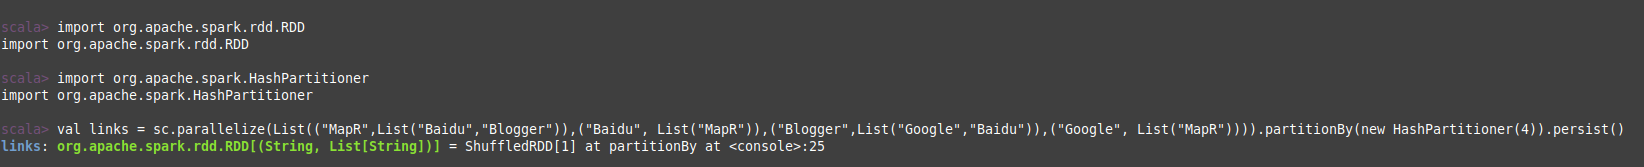

In [ ]:
''' On each iteration, have page p send a contribution of rank(p)/numNeighbors(p) to its neighbors  '''

' On each iteration, have page p send a contribution of rank(p)/numNeighbors(p) to its neighbors  '

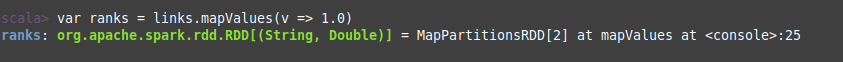

In [ ]:
'''  Set each page’s rank to 0.15 + 0.85 * contributionsReceived. '''

'  Set each page’s rank to 0.15 + 0.85 * contributionsReceived. '

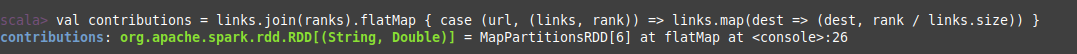

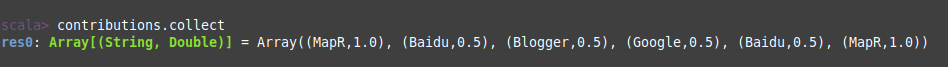

In [ ]:
''' After 1st iteration, current pagerank value for each page is: '''

' After 1st iteration, current pagerank value for each page is: '

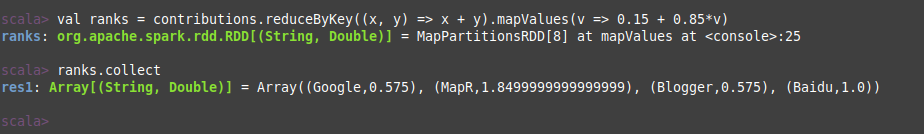

# Question 3

a) This exercise focuses on data preprocessing and feature engineering.

(i) “StandardScaler”, (ii) “MinMaxScaler”, (iii) “MaxAbsScaler”, (iv) “Elementwise-
Product”, and (v) “Normalizer”, and try out each of the operation on data set of your choice.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
scaleDF = spark.read.parquet("/content/drive/MyDrive/data/simple-ml-scaling")

In [ ]:
scaleDF.cache()
scaleDF.show()

+---+--------------+
| id|      features|
+---+--------------+
|  0|[1.0,0.1,-1.0]|
|  1| [2.0,1.1,1.0]|
|  0|[1.0,0.1,-1.0]|
|  1| [2.0,1.1,1.0]|
|  1|[3.0,10.1,3.0]|
+---+--------------+



In [ ]:
# StandardScaler

''' The StandardScaler standardizes a set of features to have zero mean and a standard deviation
of 1. The flag withStd will scale the data to unit standard deviation while the flag withMean
(false by default) will center the data prior to scaling it. '''

from pyspark.ml.feature import StandardScaler
sScaler = StandardScaler().setInputCol("features")
sScaler.fit(scaleDF).transform(scaleDF).show()

+---+--------------+-----------------------------------+
| id|      features|StandardScaler_87941a4ea11b__output|
+---+--------------+-----------------------------------+
|  0|[1.0,0.1,-1.0]|               [1.19522860933439...|
|  1| [2.0,1.1,1.0]|               [2.39045721866878...|
|  0|[1.0,0.1,-1.0]|               [1.19522860933439...|
|  1| [2.0,1.1,1.0]|               [2.39045721866878...|
|  1|[3.0,10.1,3.0]|               [3.58568582800318...|
+---+--------------+-----------------------------------+



In [ ]:
# MinMaxScaler

''' The MinMaxScaler will scale the values in a vector (component wise) to the proportional values
on a scale from a given min value to a max value. If you specify the minimum value to be 0 and
the maximum value to be 1, then all the values will fall in between 0 and 1: '''

from pyspark.ml.feature import MinMaxScaler
minMax = MinMaxScaler().setMin(5).setMax(10).setInputCol("features")
fittedminMax = minMax.fit(scaleDF)
fittedminMax.transform(scaleDF).show()

+---+--------------+---------------------------------+
| id|      features|MinMaxScaler_a1b4b9c46a9d__output|
+---+--------------+---------------------------------+
|  0|[1.0,0.1,-1.0]|                    [5.0,5.0,5.0]|
|  1| [2.0,1.1,1.0]|                    [7.5,5.5,7.5]|
|  0|[1.0,0.1,-1.0]|                    [5.0,5.0,5.0]|
|  1| [2.0,1.1,1.0]|                    [7.5,5.5,7.5]|
|  1|[3.0,10.1,3.0]|                 [10.0,10.0,10.0]|
+---+--------------+---------------------------------+



In [ ]:
# MaxAbsScaler

''' The max absolute scaler (MaxAbsScaler) scales the data by dividing each value by the maximum
absolute value in this feature. All values therefore end up between −1 and 1. This transformer
does not shift or center the data at all in the process: '''

from pyspark.ml.feature import MaxAbsScaler
maScaler = MaxAbsScaler().setInputCol("features")
fittedmaScaler = maScaler.fit(scaleDF)
fittedmaScaler.transform(scaleDF).show()

+---+--------------+---------------------------------+
| id|      features|MaxAbsScaler_f8e600d76485__output|
+---+--------------+---------------------------------+
|  0|[1.0,0.1,-1.0]|             [0.33333333333333...|
|  1| [2.0,1.1,1.0]|             [0.66666666666666...|
|  0|[1.0,0.1,-1.0]|             [0.33333333333333...|
|  1| [2.0,1.1,1.0]|             [0.66666666666666...|
|  1|[3.0,10.1,3.0]|                    [1.0,1.0,1.0]|
+---+--------------+---------------------------------+



In [ ]:
# ElementwiseProduct

''' The ElementwiseProduct allows us to scale each value in a vector by an arbitrary value. For
example, given the vector below and the row “1, 0.1, -1” the output will be “10, 1.5, -20.”
Naturally the dimensions of the scaling vector must match the dimensions of the vector inside
the relevant column: '''

from pyspark.ml.feature import ElementwiseProduct
from pyspark.ml.linalg import Vectors
scaleUpVec = Vectors.dense(10.0, 15.0, 20.0)
scalingUp = ElementwiseProduct()\
.setScalingVec(scaleUpVec)\
.setInputCol("features")
scalingUp.transform(scaleDF).show()

+---+--------------+---------------------------------------+
| id|      features|ElementwiseProduct_9b64934fdf9e__output|
+---+--------------+---------------------------------------+
|  0|[1.0,0.1,-1.0]|                       [10.0,1.5,-20.0]|
|  1| [2.0,1.1,1.0]|                       [20.0,16.5,20.0]|
|  0|[1.0,0.1,-1.0]|                       [10.0,1.5,-20.0]|
|  1| [2.0,1.1,1.0]|                       [20.0,16.5,20.0]|
|  1|[3.0,10.1,3.0]|                      [30.0,151.5,60.0]|
+---+--------------+---------------------------------------+



In [ ]:
# Normalizer

''' he normalizer allows us to scale multidimensional vectors using one of several power norms,
set through the parameter “p”. For example, we can use the Manhattan norm (or Manhattan
distance) with p = 1, Euclidean norm with p = 2, and so on. The Manhattan distance is a measure
of distance where you can only travel from point to point along the straight lines of an axis  '''


from pyspark.ml.feature import Normalizer
manhattanDistance = Normalizer().setP(1).setInputCol("features")
manhattanDistance.transform(scaleDF).show()

+---+--------------+-------------------------------+
| id|      features|Normalizer_6656d1656bab__output|
+---+--------------+-------------------------------+
|  0|[1.0,0.1,-1.0]|           [0.47619047619047...|
|  1| [2.0,1.1,1.0]|           [0.48780487804878...|
|  0|[1.0,0.1,-1.0]|           [0.47619047619047...|
|  1| [2.0,1.1,1.0]|           [0.48780487804878...|
|  1|[3.0,10.1,3.0]|           [0.18633540372670...|
+---+--------------+-------------------------------+



b

In [ ]:
sales = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("/content/drive/MyDrive/data/retail-data/by-day/*.csv")\
.coalesce(5)\
.where("Description IS NOT NULL")

In [ ]:
from pyspark.ml.feature import Tokenizer
tkn = Tokenizer().setInputCol("Description").setOutputCol("DescOut")
tokenized = tkn.transform(sales.select("Description"))
tokenized.show(20, False)

+-----------------------------------+------------------------------------------+
|Description                        |DescOut                                   |
+-----------------------------------+------------------------------------------+
|RABBIT NIGHT LIGHT                 |[rabbit, night, light]                    |
|DOUGHNUT LIP GLOSS                 |[doughnut, lip, gloss]                    |
|12 MESSAGE CARDS WITH ENVELOPES    |[12, message, cards, with, envelopes]     |
|BLUE HARMONICA IN BOX              |[blue, harmonica, in, box]                |
|GUMBALL COAT RACK                  |[gumball, coat, rack]                     |
|SKULLS  WATER TRANSFER TATTOOS     |[skulls, , water, transfer, tattoos]      |
|FELTCRAFT GIRL AMELIE KIT          |[feltcraft, girl, amelie, kit]            |
|CAMOUFLAGE LED TORCH               |[camouflage, led, torch]                  |
|WHITE SKULL HOT WATER BOTTLE       |[white, skull, hot, water, bottle]        |
|ENGLISH ROSE HOT WATER BOTT

In [ ]:
# Removing Common Words

''' A common task after tokenization is to filter stop words, common words that are not relevant in
many kinds of analysis and should thus be removed. Frequently occurring stop words in English
include “the,” “and,” and “but.” '''

from pyspark.ml.feature import StopWordsRemover
englishStopWords = StopWordsRemover.loadDefaultStopWords("english")
stops = StopWordsRemover()\
.setStopWords(englishStopWords)\
.setInputCol("DescOut")
stops.transform(tokenized).show()

+--------------------+--------------------+-------------------------------------+
|         Description|             DescOut|StopWordsRemover_faff8ab4bcf8__output|
+--------------------+--------------------+-------------------------------------+
|  RABBIT NIGHT LIGHT|[rabbit, night, l...|                 [rabbit, night, l...|
| DOUGHNUT LIP GLOSS |[doughnut, lip, g...|                 [doughnut, lip, g...|
|12 MESSAGE CARDS ...|[12, message, car...|                 [12, message, car...|
|BLUE HARMONICA IN...|[blue, harmonica,...|                 [blue, harmonica,...|
|   GUMBALL COAT RACK|[gumball, coat, r...|                 [gumball, coat, r...|
|SKULLS  WATER TRA...|[skulls, , water,...|                 [skulls, , water,...|
|FELTCRAFT GIRL AM...|[feltcraft, girl,...|                 [feltcraft, girl,...|
|CAMOUFLAGE LED TORCH|[camouflage, led,...|                 [camouflage, led,...|
|WHITE SKULL HOT W...|[white, skull, ho...|                 [white, skull, ho...|
|ENGLISH ROSE HO

In [ ]:
#Creating Word Combinations

''' Word combinations are technically referred to as n-grams—that is, sequences of words of
length n. An n-gram of length 1 is called a unigrams; those of length 2 are called bigrams, and
those of length 3 are called trigrams (anything above those are just four-gram, five-gram, etc.),
Order matters with n-gram creation, so converting a sentence with three words into bigram
representation would result in two bigrams. The goal when creating n-grams is to better capture
sentence structure and more information than can be gleaned by simply looking at all words
individually. '''

''' With n-grams, we can look at sequences of words that commonly co-occur and use them as
inputs to a machine learning algorithm. These can create better features than simply looking at
all of the words individually '''

from pyspark.ml.feature import NGram
unigram = NGram().setInputCol("DescOut").setN(1)
bigram = NGram().setInputCol("DescOut").setN(2)
unigram.transform(tokenized.select("DescOut")).show()
bigram.transform(tokenized.select("DescOut")).show()

+--------------------+--------------------------+
|             DescOut|NGram_0db7e7adf0ac__output|
+--------------------+--------------------------+
|[rabbit, night, l...|      [rabbit, night, l...|
|[doughnut, lip, g...|      [doughnut, lip, g...|
|[12, message, car...|      [12, message, car...|
|[blue, harmonica,...|      [blue, harmonica,...|
|[gumball, coat, r...|      [gumball, coat, r...|
|[skulls, , water,...|      [skulls, , water,...|
|[feltcraft, girl,...|      [feltcraft, girl,...|
|[camouflage, led,...|      [camouflage, led,...|
|[white, skull, ho...|      [white, skull, ho...|
|[english, rose, h...|      [english, rose, h...|
|[hot, water, bott...|      [hot, water, bott...|
|[scottie, dog, ho...|      [scottie, dog, ho...|
|[rose, caravan, d...|      [rose, caravan, d...|
|[gingham, heart, ...|      [gingham, heart, ...|
|[storage, tin, vi...|      [storage, tin, vi...|
|[set, of, 4, knic...|      [set, of, 4, knic...|
|   [popcorn, holder]|         [popcorn, holder]|


#THANKYOU